# A tutorial notes for Pytorch


References:
1. https://pytorch.org/tutorials/beginner/basics/intro.html


## introduction

A introduction about the basics

### Tensors

what: 

A data structure to encode the inputs, outputs, and parameters of a model, which is similar to arrays and matrices.

why: 
1. Tensors can run on GPUs or other hardware accelerators.
2. Tensors share the same underlying memory with Numpy array, eliminating the need to copy data
3. Tensors are optimized for automatic differentiation.

In [2]:
import torch
import numpy as np

#### Initalize a tensor

In [2]:
# from data
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [3]:
x_data

tensor([[1, 2],
        [3, 4]])

In [5]:
# from a Numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [6]:
x_np

tensor([[1, 2],
        [3, 4]])

In [8]:
# from another tensor, which keeps shape, datatype unless explicitly overridden.

# retain the properties of x_data
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones}\n")

# overrides the datatype of x_data
x_rand = torch.rand_like(x_data, dtype = torch.float) 
print(f"Ones Tensor: \n {x_rand}\n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]])

Ones Tensor: 
 tensor([[0.7721, 0.0448],
        [0.3881, 0.6359]])



In [12]:
# with shape 
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Random Tensor: \n {zeros_tensor} \n")


Random Tensor: 
 tensor([[0.2999, 0.4976, 0.9669],
        [0.3437, 0.3316, 0.7742]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Random Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [14]:
# attributes
tensor = torch.rand(3,4)

print(f"Shape of tensor:{tensor.shape}")
print(f"Datatype of tensor:{tensor.dtype}")
print(f"Device tensor is stored on:{tensor.device}")

Shape of tensor:torch.Size([3, 4])
Datatype of tensor:torch.float32
Device tensor is stored on:cpu


By default, tensors are created on the CPU.

Copying large tensors across devices can be expensive in terms of time and memory!

In [15]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

In [18]:
tensor.device

device(type='cuda', index=0)

In [32]:
# bridge with Numpy (share the memory)
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [33]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [34]:
# same for (numpy->torch tensor)
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n,1,out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


#### Operations

In [22]:
tensor = torch.ones(4,4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column: ' , tensor[...,-1])
tensor[:, -1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column:  tensor([1., 1., 1., 1.])
tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])


In [23]:
# Joining tensors
t1 = torch.cat([tensor,tensor,tensor], dim = 1)
print(t1)

tensor([[1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.]])


In [27]:
# arithmetic operations
# y1 = y2 = y3
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor)
torch.matmul(tensor,tensor.T,out=y3)
# matrix multiplication
print(f'y1: \n{y1}\n')
print(f'y2: \n{y2}\n')
print(f'y3: \n{y3}\n')

y1: 
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

y2: 
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

y3: 
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])



In [28]:
# element-wise product
# z1, z2, z3 have the same value
z1 = tensor * tensor

z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor,tensor,out=z3)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

In [29]:
# single-element
agg = tensor.sum()
agg

tensor(12.)

In [30]:
# to python numerical value
print(agg.item(), type(agg.item()))

12.0 <class 'float'>


In [31]:
# in-place operations denoted by _suffix
print(tensor,"\n")
tensor.add_(5)
print(tensor)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]]) 

tensor([[6., 6., 6., 5.],
        [6., 6., 6., 5.],
        [6., 6., 6., 5.],
        [6., 6., 6., 5.]])


In-place can save memory, but immediate loss of history will bring troubles in computing derivatives.

### Datasets & DataLoaders

What:

Dataset: it stores the samples and their corresponding labels.

DataLoader: it wraps an iterable around the Dataset to enable easy access to the samples. 

Why:

1. Maintain code for processing data by decoupling it from model training code to provide better readability and modularity.
2. PyTorch domain libraries provide a number of pre-loaded datasets and functions, which can be accessed by Datasets and DataLoaders.

#### Load a dataset

In [1]:
import torch
# FashionMNIST Dataset
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data", # show the path where train/test data is stored
    train = True, # specify training or test dataset
    download = True, # download the data from the internet if it's not available at root
    transform = ToTensor() # specify the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root = "data", # show the path where train/test data is stored
    train = False, # specify training or test dataset
    download = True, # download the data from the internet if it's not available at root
    transform = ToTensor() # specify the feature and label transformations
)


In [45]:
img, label = training_data[2]

In [47]:
img.shape

torch.Size([1, 28, 28])

In [51]:
# https://pytorch.org/docs/stable/generated/torch.squeeze.html
img.squeeze().shape # Returns a tensor with all the dimensions of input of size 1 removed.

torch.Size([28, 28])

In [49]:
label

0

#### visualize by map

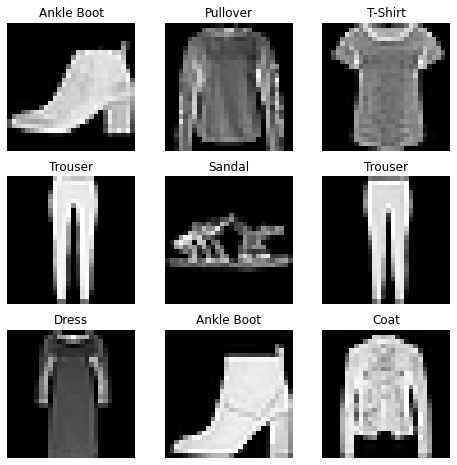

In [2]:
labels_map = {
    0:"T-Shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # generate a sample index ranging from [0, len(training_data)) randomly.
    img, label = training_data[sample_idx] # select a random training sample based on id above.
    figure.add_subplot(rows, cols, i) # i -> for-loop starts from index 1.
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray') # channel one is unneccessary when it comes to displaying.
plt.show()

#### Create a custom dataset

Dataset class must implement three functions: __init__, __len__, and __getitem__.

In [4]:
import os
import pandas as pd
from torchvision.io import read_image

# by torch.util.data.Dataset
class CustomImageDataset(Dataset):
    # initialize a dataset object with directory containing the images, the annotations file, and both transforms.
    def __init__(self, annotations_file, img_dir, transform = None, target_transform=None):
        # csv files contains annotations seperated by ',' 
        # like 
        # tshirt1.jpg, 0
        # tshirt2.jpg, 0
        # ...
        # ankleboot99.jpg, 9
        # the first is image's annotation, and the second is its corresponding label idx.
        self.img_labels = pd.read_csv(annotations_file) 
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    # the __len__ function returns the number of samples in dataset.
    def __len__(self):
        return len(self.img_labels)
    
    # the __getitem__ function loads and returns a sample from the dataset at the given index idx.
    def __getitem__(self, idx):
        # locate a image by joining the file' annotation and its parent.
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        # torchvision.io.read_image converts the image to a tensor.
        image = read_image(img_path)
        # retrieve the image's corresponding label.
        label = self.img_labels.iloc[idx, 1]
        # if applicable, call the transform functions on the image and the label.
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    
        

* Typically, when training a model, we want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and 
  use Python's multiprocessing to speed up data retrieval.

* Compared with torch.util.dataDataset retrieving dataset's features and labels one sample at a time, torch.util.data.DataLoader is an iterable that provides an easy-to-use
  "minibatches" way and abstracts this complexity.

In [5]:
from torch.utils.data import DataLoader

# Each iteration returns a batch of train_features and train_labels
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


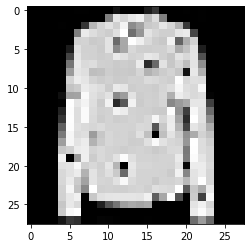

label:6


In [6]:
# iterate through the DataLoader
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# show one from the batch
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f"label:{label}")

### Transforms

Use transforms to perform some manipulation of the data and make it suitable for training.

what:

All TorchVision datasets have two parameters -
1. transform to modify the features. 
2. target_transform to modify the labels.

Why:

We need the features as normalized tensors, and the labels as one-hot encoded tensors.

In [7]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    # Convert a PIL image or Numpy ndarray into a FloatTensor,and scales the image's pixel intensity values in the range [0.,1.]
    transform = ToTensor(),
    # create a zero tensor of size 10, and calls scatter_ which assigns a value=1 on the index given by y.
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(0,torch.tensor(y), value=1))
)

The transformations accept both tensor images and batches of tensor images.

* Tensor images (C, H, W) where C means channels
* A batch of tensor images (B, C, H, W) where B is the number of images in the batch

Torchvision.transform will apply the same transformation to all the images of a given batch, but reproducible transformations need functional transforms.  

ToTensor():

Convert a PIL image or Numpy ndarray into a FloatTensor,and scales the image's pixel intensity values in the range [0.,1.]

Lambda Transforms:

Apply any user-defined lambda function.

### Build the neural network

#### A simple DFN

Given by torch.nn

In [1]:
import os 
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [2]:
# get device for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [3]:
# Define the Class

# https://pytorch.org/docs/stable/generated/torch.nn.Module.html
# nn.Module: Base class for all neural network modules.

# nn.Linear():in_features, out_features, bias
# https://pytorch.org/docs/stable/generated/torch.nn.Linear.html


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        # calling the model on the inp
        self.linear_relu_stack = nn.Sequential(
            # input image size
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            # output raw predicted values for each class. A softmax is needed to gain the probabilities.
            nn.ReLU(),
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
# create an instance and move it to the device

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [5]:
# pass a random input data, and it executes the model's forward.
X = torch.rand(1, 28, 28, device = device)
logits = model(X)

In [6]:
logits

tensor([[0.0000, 0.0000, 0.0348, 0.0000, 0.0532, 0.0975, 0.0000, 0.0000, 0.0000,
         0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)

In [7]:
# nn.Softmax: dim: A dimension along which Softmax will be computed (so every slice along dim will sum to 1).
# https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html
pred_probab = nn.Softmax(dim=1)(logits)
pred_probab.argmax(1)
# argmax(dim to keep) https://pytorch.org/docs/stable/generated/torch.argmax.html#torch.argmax
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")


Predicted class: tensor([5], device='cuda:0')


#### Model Layers

In [8]:
# flatten layer convert each 2D 28*28 image into a contiguous array of 784 pixel values
input_image = torch.rand(3, 28, 28)
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [9]:
# linear layer is a module that applies a linear transformation on the input and stored weights and biases.
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [10]:
# No-linear activations will create the complex mappings between the model's inputs and outputs, helping neural networks learn a wide variety of phenomena.
# ReLU(z)=max(0, z)
print(f"Before ReLU: \n{hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: \n{hidden1}")

Before ReLU: 
tensor([[-3.1706e-01, -1.5662e-01, -1.3143e-01,  6.7908e-02,  1.5360e-01,
         -2.7691e-01,  5.1282e-01, -2.3271e-04, -4.2544e-01, -3.5582e-01,
          3.8420e-01, -2.0431e-01,  2.7121e-01, -7.6910e-02, -9.6500e-02,
          1.4603e-01,  7.5897e-01, -2.1396e-02, -1.7443e-01,  3.8205e-01],
        [-2.4036e-01, -2.6383e-01,  2.5190e-02, -1.6716e-01, -7.1717e-02,
         -6.2537e-02,  2.7260e-01, -1.6416e-01, -1.4421e-01, -1.9516e-01,
          4.2799e-01, -2.2483e-01, -9.1911e-02,  1.3871e-02,  5.2699e-01,
          2.5722e-01,  6.6322e-01, -1.9219e-01, -1.7133e-01,  4.0427e-01],
        [-1.1872e-01, -1.7311e-01,  3.1229e-01, -3.7746e-01, -2.4232e-01,
         -6.0705e-02,  3.2630e-01, -1.0507e-01, -1.3016e-01, -3.3706e-01,
          1.5292e-01, -1.3960e-01,  2.0433e-01,  4.7560e-01,  5.6245e-01,
          4.3806e-01,  4.6230e-01,  1.1684e-01,  5.7419e-02,  3.9399e-01]],
       grad_fn=<AddmmBackward>)


After ReLU: 
tensor([[0.0000, 0.0000, 0.0000, 0.0679, 0.1536

In [11]:
## nn.Softmax is the last layer of the neural network which returns logits 
# logits: raw values in [-infty, infty]
softmax = nn.Softmax(dim = 1)
pred_probad = softmax(logits)
pred_probad

tensor([[0.0981, 0.0981, 0.1016, 0.0981, 0.1035, 0.1082, 0.0981, 0.0981, 0.0981,
         0.0981]], device='cuda:0', grad_fn=<SoftmaxBackward>)

#### Model Parameters

nn.Module automatically tracks all fields defined inside models.

accessed by model's parameters() or named_parameters()

In [12]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()}")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784])
Layer: linear_relu_stack.0.bias | Size: torch.Size([512])
Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512])
Layer: linear_relu_stack.2.bias | Size: torch.Size([512])
Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512])
Layer: linear_relu_stack.4.bias | Size: torch.Size([10])


![img_weights](./img/weights.png "Weights")

### Differentiation

* Back Propagation are adjusted according to the gradient of the loss function with respect to the given parameter

In [22]:
import torch

x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output
w = torch.randn(5, 3, requires_grad=True) # requires_grad is used to denote parameters to learn
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x,w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [23]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f4902a75310>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x7f4902a75430>


#### Computing Gradients

Compute derivatives of loss function respect to parameters in different layers. 

In [24]:
loss.backward(retain_graph = True)
print(w.grad)
print(b.grad)

tensor([[0.0372, 0.0525, 0.2464],
        [0.0372, 0.0525, 0.2464],
        [0.0372, 0.0525, 0.2464],
        [0.0372, 0.0525, 0.2464],
        [0.0372, 0.0525, 0.2464]])
tensor([0.0372, 0.0525, 0.2464])


http://galaxy.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html

* Gradients will not be available apart from the leaf nodes of the computational graph.

* backward() will only perform once. if we need several backward calls, we need to pass retain_graph=True to the backward()

In [92]:
loss.backward(retain_graph = True)
print(w.grad)
print(b.grad)

tensor([[ 2.5662,  3.6226, 17.0004],
        [ 2.5662,  3.6226, 17.0004],
        [ 2.5662,  3.6226, 17.0004],
        [ 2.5662,  3.6226, 17.0004],
        [ 2.5662,  3.6226, 17.0004]])
tensor([ 2.5662,  3.6226, 17.0004])


all tensors with require_grad=True are tracking their computational history and support gradient computation.

But in some cases, like, with the trained model, there's no need to do back propagation as only forward computations are needed.

In [95]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

True
False
False


Cases to ues:

* Funetuning a pretrained network
* speed up computations when only doing forward pass, and it will happens on tensors that do not track gradients.

#### More on Computational Graphs

* website:
https://youtu.be/MswxJw-8PvE


### Optimizing model parameters

Training a model is an iterative process. Each iteration is called an epoch, during which the model make a guess about the output, calculates the error in its guess(loss).

Collect the derivatives of the error with respect to its parameters, and optimizes the parameters using gradient descent.

In [6]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root = "data", # show the path where train/test data is stored
    train = True, # specify training or test dataset
    download = True, # download the data from the internet if it's not available at root
    transform = ToTensor() # specify the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root = "data", # show the path where train/test data is stored
    train = False, # specify training or test dataset
    download = True, # download the data from the internet if it's not available at root
    transform = ToTensor() # specify the feature and label transformations
)


In [7]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU(),
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    

model = NeuralNetwork()

#### Hyperparameters

What:

Hyperparameters are ajustable parameters that let you control the model optimization process.
(impact model training and convergence rates)

* Number of Epochs: the number of times to iterate over the dataset
* Batch Size: the number of data samples propagated through the network before the parameters are updated
* Learning Rate: how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while may result in unpredictable behavior during training.



In [8]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

#### Optimization Loop

Each iteration of the optimization loop is called an epoch. 

Each epoch consists of two main parts:
* The Train Loop: iterate over the training dataset and try to converge to optimal parameters
* The Validation/Test Loop: iterate over the test dataset to check if model performance is improving


#### Loss Function

Measure the degree of dissimilarity of obtained result with the target value.

In [9]:
loss_fn = nn.CrossEntropyLoss()

#### Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step.

Optimization algorithms(like Stochastic Gradient Descent) defines how this process is performed.

Different Optimizers such as ADAM and RMSProp that work better for different kinds of models and data.